### Dataframe de ejemplo para gráfica de barras

In [10]:
from pathlib import Path
import pandas as pd

# Ruta relativa para el archivo Excel
input_dir = Path("input")
archivo_excel = input_dir / "HDs2025 (07-04-2025).xlsx"

xls = pd.ExcelFile(archivo_excel)
df = xls.parse("PLANTILLA")

# Ajustar encabezados
df.columns = df.iloc[0]
df = df[1:]

df['NUMERO DE VICTIMAS'] = pd.to_numeric(df['NUMERO DE VICTIMAS'], errors='coerce')
victimas_por_entidad = df.groupby('ENTIDAD FEDERATIVA')['NUMERO DE VICTIMAS'].sum().sort_values(ascending=False)
victimas_por_entidad

ENTIDAD FEDERATIVA
GUANAJUATO                         869
ESTADO DE MEXICO                   485
BAJA CALIFORNIA                    432
SINALOA                            407
CHIHUAHUA                          385
MICHOACAN DE OCAMPO                379
SONORA                             342
JALISCO                            308
MORELOS                            283
TABASCO                            272
NUEVO LEON                         258
GUERRERO                           239
CIUDAD DE MEXICO                   224
VERACRUZ DE IGNACIO DE LA LLAVE    220
PUEBLA                             175
OAXACA                             168
QUINTANA ROO                       119
CHIAPAS                            114
COLIMA                             111
SAN LUIS POTOSI                     91
TAMAULIPAS                          77
ZACATECAS                           69
HIDALGO                             60
NAYARIT                             46
TLAXCALA                            32
CAMPEC

In [11]:
# Convertir Series a DataFrame long
victimas_long = victimas_por_entidad.reset_index()
victimas_long.columns = ['Entidad Federativa', 'Numero de Víctimas']

victimas_long

,Entidad Federativa,Numero de Víctimas
0,GUANAJUATO,869
1,ESTADO DE MEXICO,485
2,BAJA CALIFORNIA,432
3,SINALOA,407
4,CHIHUAHUA,385
5,MICHOACAN DE OCAMPO,379
6,SONORA,342
7,JALISCO,308
8,MORELOS,283
9,TABASCO,272


### **Código a copiar para gráfica de barras:**

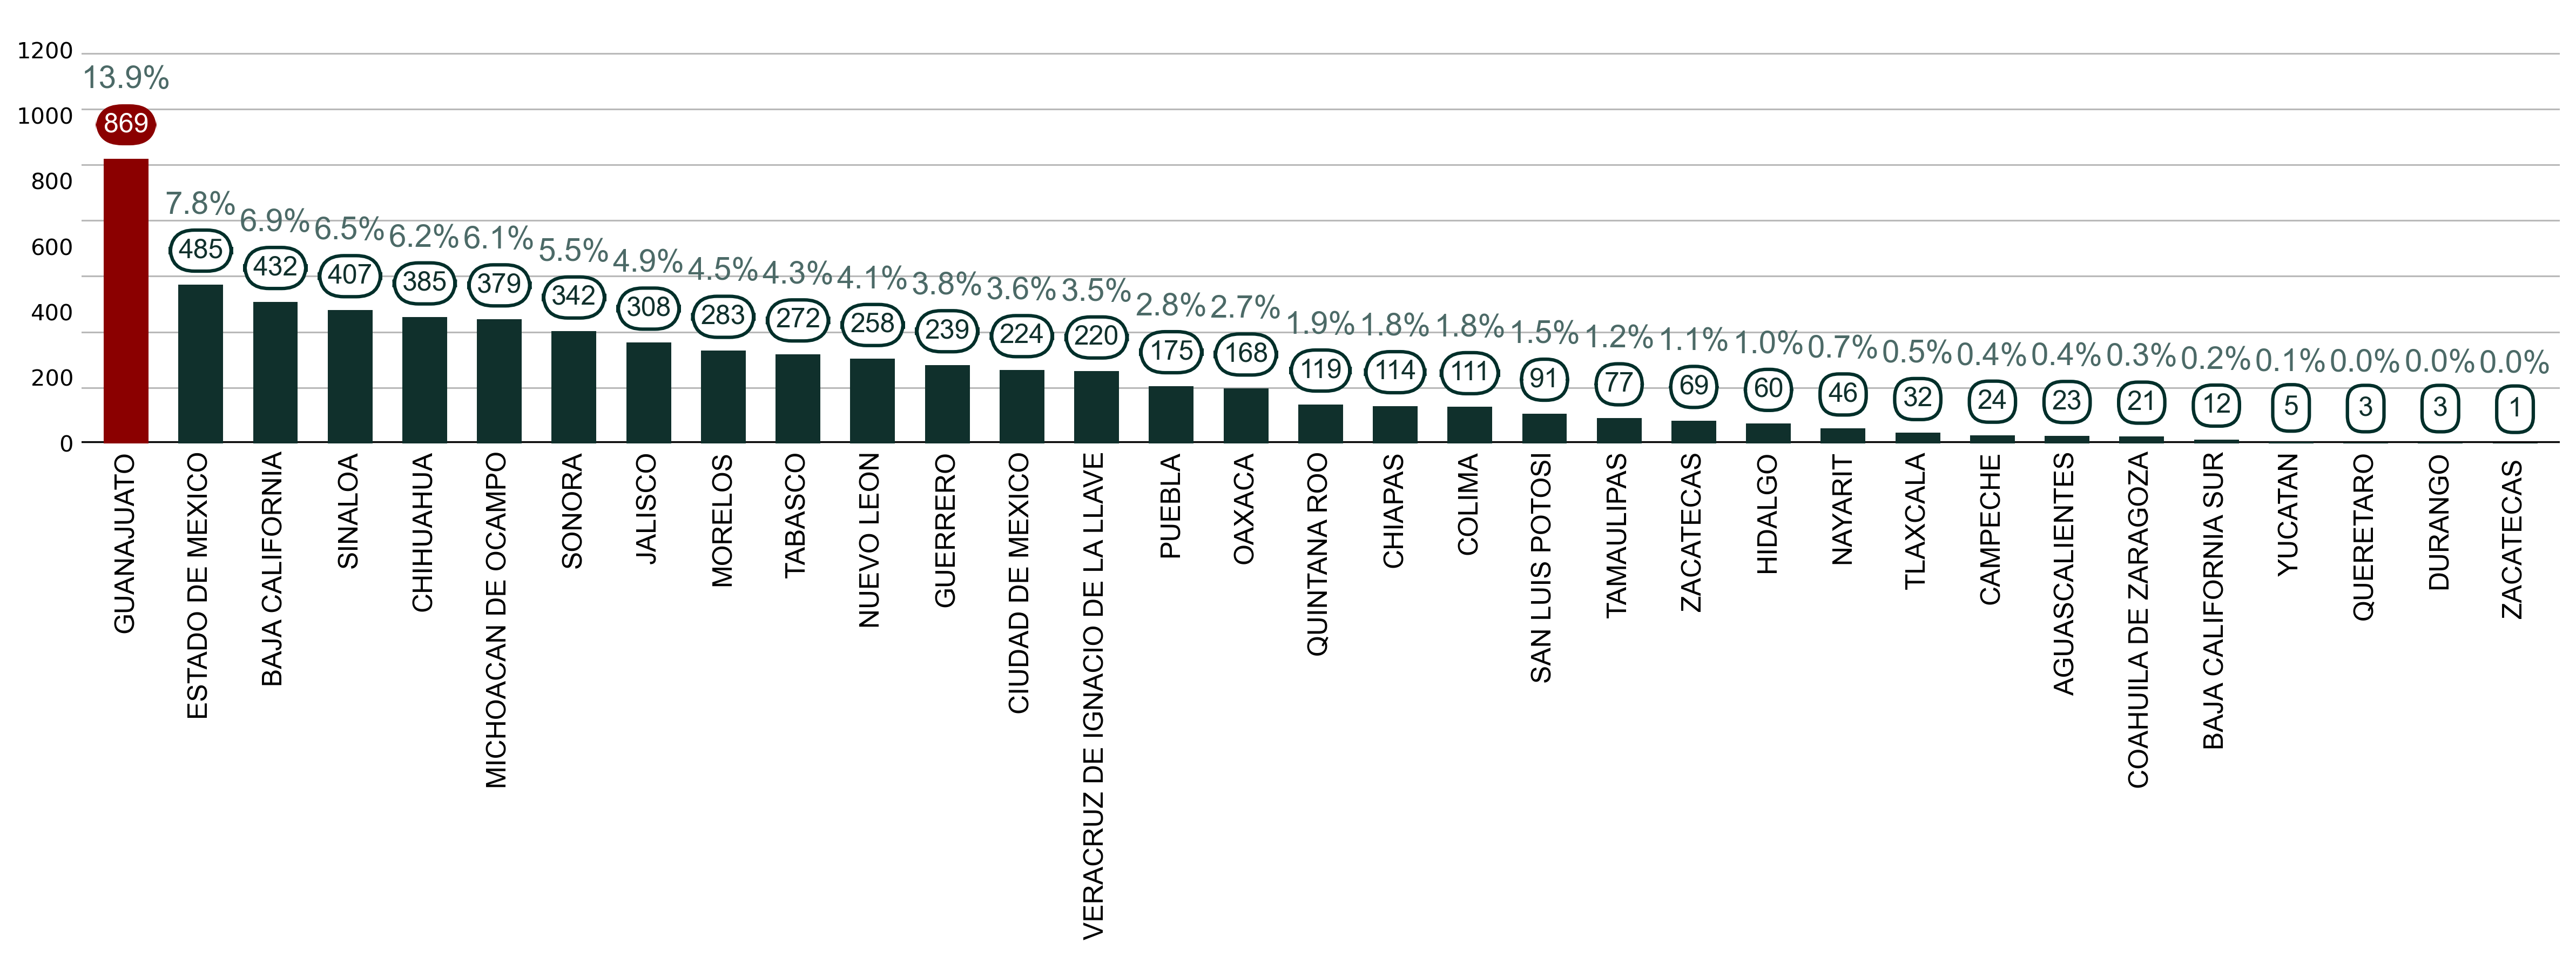

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager
from pathlib import Path

# VARIABLES A CAMBIAR:
dataframe_a_graficar = victimas_por_entidad

# Configurar las fuentes SVG como texto editable
plt.rcParams['svg.fonttype'] = 'none'

# Ruta relativa para las fuentes
font_dirs = [Path("fonts/arial")]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# Crear una instancia de FontProperties para Arial
arial_font = font_manager.FontProperties(fname=str(font_files[0]))


def calcular_intervalo(max_valor):
    """Calcula un intervalo adecuado para el eje Y basado en el valor máximo"""
    potencia = 10 ** (int(np.log10(max_valor)) - 1)
    intervalo = round(max_valor / 5 / potencia) * potencia

    # Asegurar que el intervalo no sea muy pequeño o grande
    if max_valor / intervalo > 8:
        intervalo *= 2
    elif max_valor / intervalo < 4:
        intervalo /= 2

    return max(intervalo, 1)  # Mínimo intervalo de 1

def barras_verticales(victimas_por_entidad, bar_width=0.6):
    font_config = {
        'family': 'Arial',  # Cambiar a Arial
        'titulo': {'size': 36, 'weight': 'medium', 'color': '#000000'},
        'eje_y': {'size': 12, 'weight': 'medium', 'color': '#000000'},
        'eje_x': {'size': 12, 'weight': 'medium', 'color': '#000000'},
        'etiquetas_eje_y': {'size': 24, 'weight': 'medium', 'color': '#767676'},
        'etiquetas_eje_x': {'size': 24, 'weight': 'semibold', 'color': '#767676'},
        'capsula_valor': {'size': 12, 'weight': 'medium', 'color': '#10302C'},
        'capsula_max': {'size': 12, 'weight': 'medium', 'color': 'white'},
        'porcentaje': {'size': 14, 'weight':'medium', 'color': '#4C6A67'},
        'leyenda': {'size': 20, 'weight': 'medium', 'color': '#767676'}  # Nueva categoría para la leyenda
    }

    # Ordenar datos
    sorted_items = dataframe_a_graficar.sort_values(ascending=False)
    entidades = sorted_items.index.tolist()
    valores = sorted_items.values.tolist()
    max_valor = max(valores)
    total = sum(valores)

    # Calcular límites del eje Y dinámicamente
    y_max = max_valor * 1.5
    y_interval = calcular_intervalo(max_valor)
    
    # Crear figura
    fig, ax = plt.subplots(figsize=(16, 6), dpi=300) #ajustar figsize según necesidades
    fig.patch.set_facecolor('white')
    ax.set_facecolor('white')

    # Calcular los límites horizontales
    x_min = -0.5
    x_max = len(entidades) - 0.5

    # Líneas horizontales de referencia
    y_ticks = np.arange(0, y_max + y_interval, y_interval)
    line_widths = [0.75 if y < y_max else 2 for y in y_ticks]
    line_colors = ['#B9B9B9' if y < y_max else 'black' for y in y_ticks]

    total = sum(sorted_items.values)

    for y, lw, lc in zip(y_ticks, line_widths, line_colors):
        ax.axhline(y, xmin=0, xmax=1, color=lc, linewidth=lw)

    # Línea de base (y = 0)
    ax.axhline(0, color='black', linewidth=2, zorder=1)

    # Espaciado capsulas y porcentajes
    offset_capsula = y_max * 0.05  
    offset_porcentaje = y_max * 0.15  

    # Espaciado entre barras 
    spacing_factor = 1
    bar_positions = np.arange(len(entidades)) * spacing_factor

    # Dibujar barras
    for i, (entidad, valor) in enumerate(sorted_items.items()):
        porcentaje = round((valor / total) * 100, 1)
        x_pos = bar_positions[i] 
        
        if valor == max_valor:
            # Barra más alta (original)
            for alpha in np.linspace(0.3, 1, 10):
                ax.bar(x_pos, valor, width=bar_width, 
                       color='#8B0000', alpha=alpha, 
                       edgecolor='none', zorder=2)
            
            # Cápsula roja
            ax.text(x_pos, valor + offset_capsula, f"{valor:,}",  # Ajusté ligeramente el offset
                    ha='center', va='bottom',  # Cambiado a 'bottom' para mejor alineación
                    fontsize=font_config['capsula_max']['size'],
                    fontfamily=font_config['family'],
                    fontweight=font_config['capsula_max']['weight'],
                    color=font_config['capsula_max']['color'],
                    bbox=dict(boxstyle="round,pad=0.3,rounding_size=0.99", 
                             facecolor='#8B0000',
                             edgecolor='none'))
        else:
            # Barras normales (original)
            for alpha in np.linspace(0.1, 0.8, 10):
                ax.bar(x_pos, valor, width=bar_width, 
                       color='#10302C', alpha=alpha, 
                       edgecolor='none', zorder=2)
                
                if valor <= 5:
                        boxstyle = "round,pad=0.4,rounding_size=0.59"
                elif valor <= 50:
                        boxstyle = "round,pad=0.3,rounding_size=0.7"
                elif valor <= 100:
                        boxstyle = "round,pad=0.3,rounding_size=0.79"
                else:
                        boxstyle = "round,pad=0.3,rounding_size=0.9"
            
            # Cápsula verde 
            ax.text(
                x_pos, valor + offset_capsula, f"{valor:,}",
                ha='center', va='bottom',
                fontsize=font_config['capsula_valor']['size'],
                fontfamily=font_config['family'],
                fontweight=font_config['capsula_valor']['weight'],
                color=font_config['capsula_valor']['color'],
                bbox=dict(
                    boxstyle=boxstyle,
                    facecolor='white',
                    edgecolor='#002F2A',
                    linewidth=1.5))
        
        # Porcentaje 
        ax.text(
            x_pos, valor + offset_porcentaje, f"{porcentaje}%",
            color=font_config['porcentaje']['color'],
            fontsize=font_config['porcentaje']['size'],
            fontfamily=font_config['family'],
            fontweight=font_config['porcentaje']['weight'],
            ha='center',
            va='bottom'
        )

    # Configuración de ejes
    ax.set_xticks(bar_positions)
    ax.set_xticklabels(entidades, rotation=90, 
                      fontsize=font_config['eje_x']['size'],
                      fontfamily=font_config['family'],
                      fontweight=font_config['eje_x']['weight'])

    # Ajustar límites para el nuevo espaciado
    ax.set_ylim(0, y_max)
    ax.set_xlim(-0.5, len(bar_positions) * spacing_factor - 0.5)
 

    # Configuración de ejes X con spacing correcto
    ax.set_xticks(bar_positions)
    ax.set_xticklabels(entidades, rotation=90, # puede ser 54
                    fontsize=font_config['eje_x']['size'],
                    fontfamily=font_config['family'],
                    fontweight=font_config['eje_x']['weight'])

    # Ajustar límites del eje X con base en posiciones reales
    ax.set_xlim(bar_positions[0] - bar_width, bar_positions[-1] + bar_width)

    
    # Eliminar bordes y marcos
    for spine in ax.spines.values():
        spine.set_visible(False)
    
    ax.tick_params(axis='both', which='both', length=0)
    ax.grid(False)

    plt.tight_layout()
        
    # Guardar la gráfica como archivo SVG
    plt.savefig("barras_verticales.svg", format="svg", bbox_inches='tight')
    plt.show()

barras_verticales(dataframe_a_graficar)